# Machine Learning Module - Unsupervised Learning

### 1. Load the required libraries and read the dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('renttherunway.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [3]:
## Checking first few samples
df.head(2)

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"


In [4]:
## Checking shape of the given dataset
df.shape

(192544, 15)

In [5]:
## Checking basic information of the given dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192544 non-null  object 
 1   user_id         192544 non-null  int64  
 2   bust size       174133 non-null  object 
 3   item_id         192544 non-null  int64  
 4   weight          162562 non-null  object 
 5   rating          192462 non-null  float64
 6   rented for      192534 non-null  object 
 7   review_text     192476 non-null  object 
 8   body type       177907 non-null  object 
 9   review_summary  192197 non-null  object 
 10  category        192544 non-null  object 
 11  height          191867 non-null  object 
 12  size            192544 non-null  int64  
 13  age             191584 non-null  float64
 14  review_date     192544 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 22.0+ MB


- There are 190+ K samples with 15 different features
- We can observe there are missing values as the count is not same for all the given features
- There are around 10 object type variables and 5 numerical variables.

# Data cleansing and Exploratory data analysis:

### 3. Check if there are any duplicate records in the dataset? If any drop them

In [6]:
## Cheking Duplicates
len(df[df.duplicated()])

189

- There are around 189 duplicated records, lets drop them.

In [7]:
## Dropping duplicates
df.drop_duplicates(inplace=True)

In [8]:
## Re-checking after dropping duplicates records
len(df[df.duplicated()])

0

### 4. Drop the columns which you think redundant for the analysis.

In [9]:
## Dropping redundant columns
df.drop(['user_id', 'item_id', 'review_text', 'review_summary', 'review_date'],axis=1,inplace=True)

In [10]:
df.head(2)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34b,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0


### 5. Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float.

In [11]:
df['weight'] = df['weight'].str.replace('lbs','').astype(float)

In [12]:
df['weight'].head()

0    137.0
1    132.0
2      NaN
3    135.0
4    145.0
Name: weight, dtype: float64

### 6. Check the unique categories for the column 'rented for' and group 'party: cocktail' category with the 'party'.

In [13]:
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [14]:
## grouping 'party: cocktail'with the 'party'.
df['rented for'] = df['rented for'].str.replace('party: cocktail','party')

In [15]:
## Rechecking after correcting respective values
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan], dtype=object)

### 7. The column 'height' is in feet with a quotation mark, Convert to inches with float datatype.

In [16]:
## Removing quotation marks
df['height'] = df['height'].str.replace("'",'')
df['height'] = df['height'].str.replace('"','')

In [17]:
## Converting the feet to inches and then converting to float
df['height'] = (df['height'].str[:1].astype(float)*12 + df['height'].str[1:].astype(float))

In [18]:
df['height'].head()

0    68.0
1    66.0
2    64.0
3    65.0
4    69.0
Name: height, dtype: float64

### 8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods.

In [19]:
df.isnull().sum()/len(df)*100

fit            0.000000
bust size      9.561488
weight        15.572769
rating         0.042110
rented for     0.005199
body type      7.603130
category       0.000000
height         0.350914
size           0.000000
age            0.499077
dtype: float64

- except size, category, and fit columns rest all columns has missing values.

In [20]:
## Treating numerical null values with meadian.
for col in ['weight','rating','height','age']:
    df[col].fillna(df[col].median(), inplace=True)

In [21]:
## Treating Categorical null values with Mode.
for col in ['bust size','rented for','body type','category']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [22]:
## Rechecking null after imputation
df.isnull().sum()

fit           0
bust size     0
weight        0
rating        0
rented for    0
body type     0
category      0
height        0
size          0
age           0
dtype: int64

### 9. Check the statistical summary for the numerical and categorical columns and write your findings.

In [23]:
## checking the statistical summary for the numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
weight,192355.0,137.019875,20.143567,50.0,125.0,135.0,145.0,300.0
rating,192355.0,9.092709,1.429922,2.0,8.0,10.0,10.0,10.0
height,192355.0,65.309334,2.658946,54.0,63.0,65.0,67.0,78.0
size,192355.0,12.245801,8.496299,0.0,8.0,12.0,16.0,58.0
age,192355.0,33.860633,8.039386,0.0,29.0,32.0,37.0,117.0


In [24]:
## Checking statistical summary for the categorical columns.
df.describe(include='O').T

,count,unique,top,freq
fit,192355,3,fit,141909
bust size,192355,106,34b,45647
rented for,192355,8,wedding,57747
body type,192355,7,hourglass,69915
category,192355,68,dress,92752


- The average weight of the customer is around 137lbs.
- The average rating is around 9.
- The maximum height of the customer is 78 inches.
- The maximum standarized size of the product is 58.
- The age range is 0 to 117.
- Note we can see the min age is 0 we need to impute it with appropriate value and the maximun age we need to cap it to Upperlimit.
- Most of the customers rented the product for wedding and the most appeared product category is as dress.

### 10. Is there outliers present in the column age? If yes treat them with appropriate method

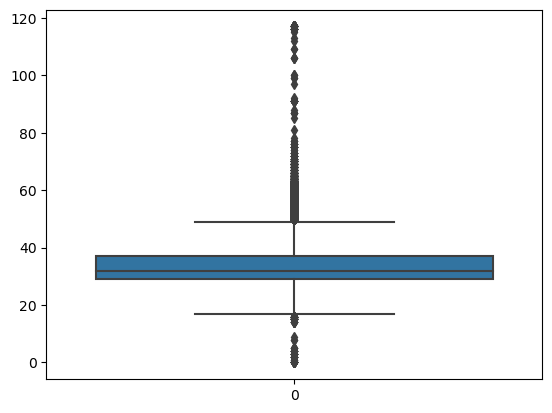

In [25]:
sns.boxplot(df['age'])
plt.show()

In [26]:
## Treating the outliers in the column age using capping techinque

df['age'] = pd.DataFrame(np.where(df['age']>=100,100,df['age']))
df['age'] = pd.DataFrame(np.where(df['age']<=20,20,df['age']))

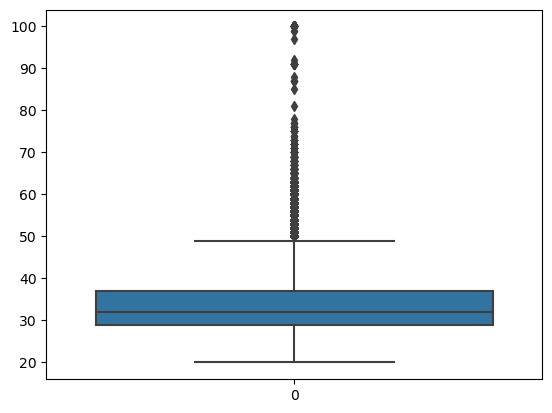

In [27]:
sns.boxplot(df['age'])
plt.show()

In [28]:
## dropping missing values in columns age if any after computation
df.dropna(inplace=True)

### 11. Check the distribution of the different categories in the column 'rented for' using appropriate plot.

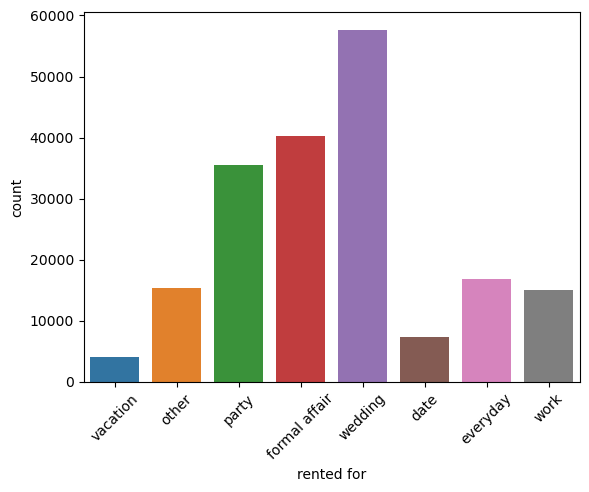

In [29]:
## Checking the distribution of the column rented for
sns.countplot(x=df['rented for'])
plt.xticks(rotation=45)
plt.show()

- We can see that the most of the customers rented the product for the wedding followed by party and formal affair.

# 3. Data Preparation for model building:

In [30]:
## Copying dataset before encoding and standardizing the columns
dfc1 = df.copy()

### 12. Encode the categorical variables in the dataset.

In [31]:
## Encoding categorical variables using label encoder

## select object datatype variables
object_type_variables = [i for i in df.columns if df.dtypes[i] == object]
object_type_variables 


le = LabelEncoder()

def encoder(df):
    for i in object_type_variables:
        q = le.fit_transform(df[i].astype(str))  
        df[i] = q                               
        df[i] = df[i].astype(int)
encoder(df)

In [32]:
df.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0,39,137.0,10.0,5,3,44,68.0,14,28.0
1,0,37,132.0,10.0,3,6,20,66.0,12,36.0
2,0,37,135.0,10.0,4,3,45,64.0,4,100.0
3,0,38,135.0,8.0,2,4,16,65.0,8,34.0
4,0,37,145.0,10.0,6,1,20,69.0,12,27.0


### 13. Standardize the data, so that the values are within a particular range.

In [33]:
## Tranforming the data using minmax scaling approach so that the values range will be 1.

mm = MinMaxScaler()

df.iloc[:,:] = mm.fit_transform(df.iloc[:,:])
df.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0.0,0.371429,0.348,1.00,0.714286,0.500000,0.656716,0.583333,0.241379,0.1000
1,0.0,0.352381,0.328,1.00,0.428571,1.000000,0.298507,0.500000,0.206897,0.2000
2,0.0,0.352381,0.340,1.00,0.571429,0.500000,0.671642,0.416667,0.068966,1.0000
3,0.0,0.361905,0.340,0.75,0.285714,0.666667,0.238806,0.458333,0.137931,0.1750
4,0.0,0.352381,0.380,1.00,0.857143,0.166667,0.298507,0.625000,0.206897,0.0875


In [34]:
## Making another copy of the cleaned dataset after encoding and standardizing the columns.
dfc2 = df.copy()

### 14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same. 

In [35]:
## step1: Calculate the covariance matrix.
cov_matrix = np.cov(df.T)
cov_matrix

array([[ 1.26730745e-01,  3.45701617e-04,  3.89168782e-04,
        -1.55972778e-02,  8.78647447e-04, -7.07071132e-04,
         1.44511855e-05,  1.02680451e-05,  3.40946354e-03,
         6.17262942e-06],
       [ 3.45701617e-04,  1.08867149e-02,  4.78083550e-03,
        -3.93676333e-04, -5.98882983e-05, -5.91196654e-03,
        -2.18508806e-04,  1.70272658e-03,  9.58697159e-03,
         1.79219656e-05],
       [ 3.89168782e-04,  4.78083550e-03,  6.49054977e-03,
        -3.00611278e-04,  2.31081613e-04, -4.95890557e-03,
        -2.22493614e-04,  3.11676011e-03,  8.53408158e-03,
        -5.94072717e-06],
       [-1.55972778e-02, -3.93676333e-04, -3.00611278e-04,
         3.19574727e-02,  6.63820980e-04,  2.22987872e-04,
        -8.05529964e-04,  3.50561318e-05, -9.61954298e-04,
         4.54908867e-06],
       [ 8.78647447e-04, -5.98882983e-05,  2.31081613e-04,
         6.63820980e-04,  8.65633768e-02, -7.05120242e-04,
        -3.23050298e-03, -5.60041470e-04,  2.13246115e-04,
        -1.

In [36]:
## step2: Calculate the eigen values and eigen vectors.
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print('eigein vals:','\n',eig_vals)
print('\n')
print('eigein vectors','\n',eig_vectors)

eigein vals: 
 [0.12938976 0.08680527 0.07224491 0.03631375 0.02964848 0.02838126
 0.00235741 0.00516446 0.01126672 0.00987405]


eigein vectors 
 [[-9.86372904e-01 -1.67817535e-02 -2.68987573e-02  1.74759323e-02
  -1.51875288e-01 -4.98824100e-02  6.45514540e-03 -1.18206470e-02
   4.70738339e-03  3.27795763e-05]
 [-7.48815116e-03  4.14554752e-03  1.35147780e-01  1.88244564e-02
   2.04955240e-01 -3.73968854e-01 -1.22881254e-01 -8.62686190e-01
  -1.99878578e-01 -1.30151965e-02]
 [-7.08464750e-03  6.67437203e-03  1.12228985e-01  1.62226924e-02
   1.65721693e-01 -3.06774966e-01  9.27436082e-01  4.49882568e-02
   5.75037289e-02 -1.96745018e-03]
 [ 1.58226924e-01  1.73682515e-02 -2.67121451e-03  1.02822736e-01
  -8.64703867e-01 -4.65035702e-01  9.92905539e-04 -1.01662148e-03
  -1.04527413e-02 -8.20422044e-04]
 [-1.82056607e-02  9.96583741e-01 -4.54436596e-02 -6.53225158e-02
   9.03480164e-03 -1.28979703e-04 -2.65763611e-03 -2.80231857e-03
   7.59419093e-03  1.73527053e-03]
 [ 1.85389811e-02 

In [37]:
## step3: Scree plot.
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Explained Variance: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Explained Variance:  [31.44756182756907, 21.097606455245767, 17.558780484644178, 8.825884429678059, 7.205921116170703, 6.89793062061895, 2.7383216880096533, 2.399840275144109, 1.2551968667573832, 0.5729562361621161]
Cummulative Variance Explained:  [ 31.44756183  52.54516828  70.10394877  78.9298332   86.13575431
  93.03368493  95.77200662  98.1718469   99.42704376 100.        ]


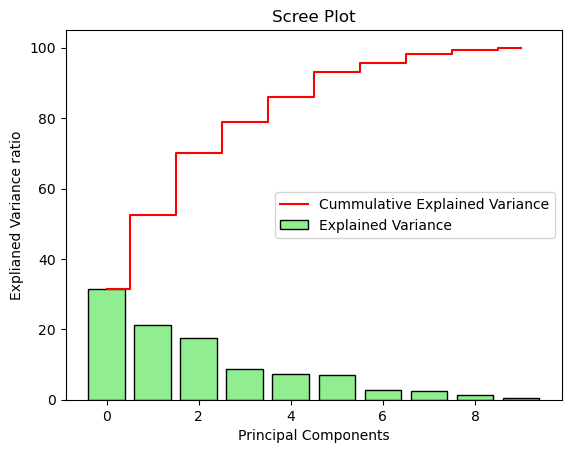

In [38]:
## Scree plot.
plt.bar(range(10),var_exp,align='center',color='lightgreen',edgecolor='black',label='Explained Variance')
plt.step(range(10),cum_var_exp,where='mid',color='red',label='Cummulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explianed Variance ratio')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.show()

- We can observe from the above scree plot the first 6 principal components are explaining the about 90-95% of the variation, So we can choose optimal number of principal components as 6.

### 15. Apply K-means clustering and segment the data (You may use original data or PCA transformed data)
- a. Find the optimal K Value using elbow plot for KMeans clustering.
- b. Build a Kmeans clustering model using the obtained optimal K value from the elbow plot.
- c. Compute silhoutte score for evaluating the quality of the Kmeans clustering technique.

In [39]:
## Using the dimensions obtainted from the PCA to apply clustering
pca = PCA(n_components=6)

pca_df = pd.DataFrame(pca.fit_transform(df),columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.209133,-0.136583,0.009660,0.296642,-0.067215,0.110611
1,-0.225558,0.147587,-0.476618,-0.079279,-0.001126,0.151264
2,-0.218292,0.009051,-0.036041,0.309346,-0.150861,-0.042320
3,-0.184834,0.276023,-0.165377,-0.117140,0.147685,-0.098476
4,-0.201696,-0.316338,0.318520,-0.045902,-0.092240,-0.013113


- These are the new dimensions obtained from the application of PCA.

#### Kmeans clustering (using the PCA tranformed data)

In [40]:
## finding optimal K value by KMeans clustering using Elbow plot.
cluster_errors = []
cluster_range = range(2,15)
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

In [41]:
## creataing a dataframe of number of clusters and cluster errors.
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})

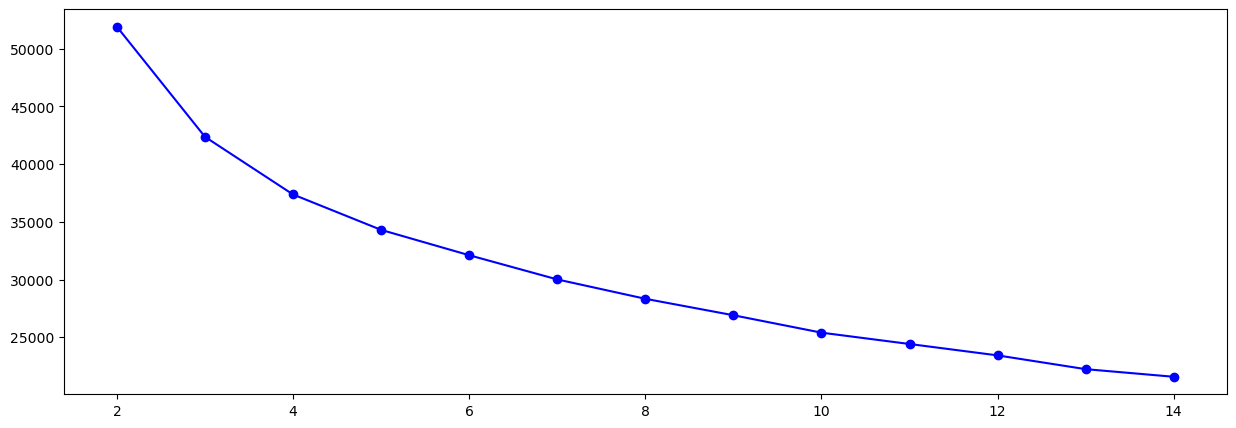

In [42]:
## Elbow plot.
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='o',color='b')
plt.show()

- From the above elbow plot we can see at the cluster K=3, the inertia significantly decreases . Hence we can select our optimal clusters as K=3.

In [43]:
## Applying KMeans clustering for the optimal number of clusters obtained above.
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [44]:
## creating a dataframe of the labels.
label = pd.DataFrame(kmeans.labels_,columns=['Label'])

In [45]:
## joining the label dataframe to the pca_df dataframe.
kmeans_df = pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,Label
0,-0.209133,-0.136583,0.009660,0.296642,-0.067215,0.110611,1
1,-0.225558,0.147587,-0.476618,-0.079279,-0.001126,0.151264,2
2,-0.218292,0.009051,-0.036041,0.309346,-0.150861,-0.042320,1
3,-0.184834,0.276023,-0.165377,-0.117140,0.147685,-0.098476,2
4,-0.201696,-0.316338,0.318520,-0.045902,-0.092240,-0.013113,1


In [46]:
kmeans_df['Label'].value_counts()

Label
1    82498
2    65782
0    43697
Name: count, dtype: int64

In [48]:
## finding optimal clusters through silhoutte score
from sklearn.metrics import silhouette_score
for i in range(2,15):
    kmeans = KMeans(i,random_state=100)
    kmeans.fit(pca_df)
    labels = kmeans.predict(pca_df)
    print(i,silhouette_score(pca_df,labels))

KeyboardInterrupt: 

- Above from elbow plot we chose optimal K value as 3 and we built a Kmeans clustering model.
- From the silhoutte score we can observe the for clusters 2 and 3 the score is higher. We can build Kmeans clustering model using the optimal K value as either 2 or 3.

### 16. Apply Agglomerative clustering and segement the data.
- a. Find the optimal K Value using dendrogram for Agglomerative clustering.
- b. Build a Agglomerative clustering model using the obtained optimal K value from observed from dendrogram.
- c. Compute silhouette score for evaluating the quality of the Agglomerative
clustering technique. (Hint: Take a sample of the dataset for agglomerative
clustering to reduce the computational time)

#### Agglomerative clustering (using original data)

In [49]:
## Since dataset is huge plotting dendrogram might be time consuming.
## Hence taking smaller dataset

In [50]:
### Copying sample dataset
dfc3 = dfc2.sample(n=50000)

## reseting the index
dfc3.reset_index(inplace=True,drop=True)

In [51]:
dfc3.head(4)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0.0,0.609524,0.760,1.00,0.857143,0.666667,0.298507,0.416667,0.775862,0.3250
1,0.0,0.228571,0.280,0.75,0.285714,1.000000,0.298507,0.458333,0.068966,0.1375
2,0.0,0.352381,0.312,1.00,1.000000,0.500000,0.194030,0.666667,0.068966,0.1375
3,1.0,0.209524,0.288,0.75,0.857143,0.166667,0.238806,0.541667,0.017241,0.1625


#### Dendrogram

In [ ]:
plt.figure(figsize=[18,5])
merg = linkage(dfc3, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

- We look for the largest distance that we can vertically observe without crossing any horizontal line.
- We can observe from the above dendrogram that we can choose optimal clusters has 2.

In [ ]:
## Building hierarchical clustering model using the optimal clusters as 2
hie_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean',
                                     linkage='ward')
hie_cluster_model = hie_cluster.fit(dfc3)

In [ ]:
## Creating a dataframe of the labels
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

In [ ]:
## joining the label dataframe with unscaled initial cleaned dataframe.(dfc1)

df_hier = dfc1.join(df_label1)
df_hier.head()

In [ ]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(dfc3)
    labels = hier.fit_predict(dfc3)
    print(i,silhouette_score(dfc3,labels))

- We can observe from the silhouette scores for the agglomerative clustering for the 2 clusers the silhouette score is higher. 

### 17. Conclusion.

Perform cluster analysis by doing bivariate analysis between cluster label and different features and write your
conclusion on the results.

In [ ]:
df_hier.head(2)

In [ ]:
df_hier['Labels'].value_counts().plot(kind='pie',autopct='%0.1f')
plt.show()

- We can observe that the clusters formed are imbalanced. There are more number of records assigned to cluster 0 than that of cluster 1.

In [ ]:
## Checking the distribution of the different categories of 'rented for' column 
sns.countplot(df_hier['rented for'],hue='Labels',data=df_hier)
plt.xticks(rotation = 45)
plt.show()

-  We can observe that there are more number of users who have rented the product is for 'wedding' and also there are more number of users belong to the cluster 0 compare to the cluster 1.

In [ ]:
## Checking the age distribution of the different clusters.
sns.kdeplot(df_hier['age'],hue='Labels',data=df_hier)
plt.show()

- The distribution of the age for different clusters is almost same, since there are more number of observations assigned to the cluster 0.

- In this project, we have attempted to implement and apply PCA on the renttherunway dataset and we selected 6 PCA compoments, which gave us the 90-95% of the variance in the data.
- Also, we have used the PCA dimensions to cluster the data and segment the similar data in to clusters using KMeans clustering.
- We have used Kmeans clustering algorithm to cluster the data, First we chose the optimal K value with the help of elbow plot used obtained K value from elbow plot to build a kmeans clustering model.
- We have computed the silhoutte score for the different K values and evaluated the goodness of the clustering technique used.
- We took the sample of the data and did agglomerative clustering using the original data and plotted dendrogram and analyzed the optimal number of classes and built a agglomerative clustering model using the obtained K value and evaluated the model using silhoutte score.
- In this dataset, we had less number of features, further we can ask the company to collect the demographic information such as income and education. Geographic info such as where the customer is located rural or urban, city etc. Behavioral info such as browsing, spent amount by category, sentiment towards specific products and price points, and lastly the survey on lifestyle info such as hobbies, fashion etc.
- By collecting more features, the customer segmentation/clustering of similar customers into groups will be more effective and we can infer more out of the clusters formed and will able to give suggestions to the company based on the analysis that will help the business to target the right customers and stand in the market for longer and make high revenue. 